In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [5]:
df = pd.read_excel("./uni.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 22 columns):
Year of Admission and Batch of the student    1573 non-null int64
Gender                                        1573 non-null object
Resedential Area and city of origin           1573 non-null object
SSC Marks                                     1140 non-null float64
HSSC Marks                                    730 non-null float64
Entry Test Score Marks                        1568 non-null float64
1st Semester                                  1572 non-null float64
2nd Semester                                  1090 non-null float64
3rd Semester                                  1066 non-null float64
4th Semester                                  712 non-null float64
5th Semester                                  679 non-null float64
6th Semester                                  463 non-null float64
7th Semester                                  410 non-null float64
8th Semester      

In [6]:
df.head()

,Year of Admission and Batch of the student,Gender,Resedential Area and city of origin,SSC Marks,HSSC Marks,Entry Test Score Marks,1st Semester,2nd Semester,3rd Semester,4th Semester,...,7th Semester,8th Semester,9th Semester,10th Semester,11th Semester,12th Semester,13th Semester,14th Semester,15th Semester,Cumulative GPA
0,2012,M,Karachi,645.0,364.0,43.68,1.41,2.15,2.00,2.10,...,1.50,1.10,2.00,0.69,2.33,1.60,2.00,1.08,0.00,1.92
1,2013,M,Karachi,638.0,312.0,47.04,1.22,2.31,1.98,0.41,...,4.00,1.56,1.23,1.15,0.00,1.67,1.50,0.00,0.00,2.09
2,2013,M,Karachi,693.0,686.0,47.73,1.74,1.54,2.85,1.35,...,1.52,3.00,1.07,2.04,2.00,2.07,1.44,1.33,NaN,2.00
3,2013,M,Karachi,649.0,838.0,57.68,1.16,2.49,1.61,1.04,...,1.00,1.78,1.62,3.33,2.40,2.05,2.67,2.08,1.33,2.14
4,2013,M,Karachi,705.0,650.0,41.98,1.08,2.87,0.88,1.25,...,1.31,1.90,2.00,0.93,1.50,1.58,1.73,0.00,NaN,2.01


In [7]:
[(x,len(df[df[x].isna()])) for x in df.columns]

[('Year of Admission and Batch of the student', 0),
 ('Gender', 0),
 ('Resedential Area and city of origin', 0),
 ('SSC Marks', 433),
 ('HSSC Marks', 843),
 ('Entry Test Score Marks', 5),
 ('1st Semester', 1),
 ('2nd Semester', 483),
 ('3rd Semester', 507),
 ('4th Semester', 861),
 ('5th Semester', 894),
 ('6th Semester', 1110),
 ('7th Semester', 1163),
 ('8th Semester', 1386),
 ('9th Semester', 1477),
 ('10th Semester', 1513),
 ('11th Semester', 1533),
 ('12th Semester', 1545),
 ('13th Semester', 1556),
 ('14th Semester', 1561),
 ('15th Semester', 1568),
 ('Cumulative GPA', 0)]

# 1) What is the overall trend of our student's semester-wise performance over the past few years? Are we as faculty doing good with students?

In [8]:
len(df['Cumulative GPA'].unique())

231

In [9]:
df1=df[df['Cumulative GPA']<2.0].groupby(by=['Year of Admission and Batch of the student']).agg(['count'])[['Gender']]
df1.columns = ['CGPA < 2.0']
df1.head()

df2=df[df['Cumulative GPA']>=2.0].groupby(by=['Year of Admission and Batch of the student']).agg(['count'])[['Gender']]
df2.columns = ['CGPA >= 2.0']
df2.head()

df3=df[df['Cumulative GPA']>=3.0].groupby(by=['Year of Admission and Batch of the student']).agg(['count'])[['Gender']]
df3.columns = ['CGPA >= 3.0']
df3.head()

,CGPA >= 3.0
Year of Admission and Batch of the student,
2016,62
2017,88
2018,99


In [10]:
df4=df.groupby(by=['Year of Admission and Batch of the student'], 
           sort=[False])[["Cumulative GPA"]].agg(['count','min','max','mean','std'])
df5 = pd.concat([df4,df1,df2,df3], axis=1)

df5.columns = ['Total','Min','Max','Mean','STD','CGPA < 2.0','CGPA >= 2.0','CGPA >= 3.0']

df5["PassingRatio"] = df5['CGPA >= 2.0'] / df5['Total'] * 100
df5['FailureRatio'] = 100 - df5.PassingRatio
df5.fillna(value=0, inplace=True)
df5

,Total,Min,Max,Mean,STD,CGPA < 2.0,CGPA >= 2.0,CGPA >= 3.0,PassingRatio,FailureRatio
Year of Admission and Batch of the student,,,,,,,,,,
2012,1,1.92,1.92,1.920000,0.000000,1.0,0.0,0.0,0.000000,0.000000
2013,7,2.00,2.23,2.081429,0.085912,0.0,7.0,0.0,100.000000,0.000000
2014,16,1.83,2.19,2.060000,0.107331,3.0,13.0,0.0,81.250000,18.750000
2015,43,1.78,2.68,2.153953,0.186511,4.0,39.0,0.0,90.697674,9.302326
2016,351,0.00,3.90,2.610741,0.451164,12.0,339.0,62.0,96.581197,3.418803
2017,276,0.00,3.97,2.714710,0.571250,16.0,260.0,88.0,94.202899,5.797101
2018,411,0.00,3.86,2.534599,0.715152,53.0,358.0,99.0,87.104623,12.895377
2019,468,0.00,0.00,0.000000,0.000000,468.0,0.0,0.0,0.000000,0.000000


In [11]:
q1=df.groupby(by=['Year of Admission and Batch of the student','Cumulative GPA'], 
           sort=[True, False])[["Gender"]].agg(['count'])

q1 = q1.reset_index()
q1.columns = ['Year','CGPA','NoStudentCounts']
q1.sort_values(by=['Year','NoStudentCounts'], ascending=[True,False])

,Year,CGPA,NoStudentCounts
0,2012,1.92,1
1,2013,2.00,2
2,2013,2.01,1
3,2013,2.09,1
4,2013,2.10,1
5,2013,2.14,1
6,2013,2.23,1
14,2014,2.09,2
16,2014,2.12,2
7,2014,1.83,1


In [12]:
df.columns

Index(['Year of Admission and Batch of the student', 'Gender',
       'Resedential Area and city of origin', 'SSC Marks', 'HSSC Marks',
       'Entry Test Score Marks', '1st Semester', '2nd Semester',
       '3rd Semester', '4th Semester', '5th Semester', '6th Semester',
       '7th Semester', '8th Semester', '9th Semester', '10th Semester',
       '11th Semester', '12th Semester', '13th Semester', '14th Semester',
       '15th Semester', 'Cumulative GPA'],
      dtype='object')

In [13]:
for year in df['Year of Admission and Batch of the student'].unique():
    print("===========",year,"=======")
    df1 = df[df['Year of Admission and Batch of the student']==year]
    print("Number of Students:",len(df1))
    df2 = pd.DataFrame(df1['Cumulative GPA'].value_counts())
    df2 = df2.reset_index()
    df2.columns=['CGPA','count']
    print(df2)

=========== 2012 =======
Number of Students: 1
   CGPA  count
0  1.92      1
=========== 2013 =======
Number of Students: 7
   CGPA  count
0  2.00      2
1  2.01      1
2  2.10      1
3  2.14      1
4  2.23      1
5  2.09      1
=========== 2014 =======
Number of Students: 16
    CGPA  count
0   2.12      2
1   2.09      2
2   1.83      1
3   1.94      1
4   2.05      1
5   2.13      1
6   2.08      1
7   2.10      1
8   2.19      1
9   2.01      1
10  2.17      1
11  1.86      1
12  2.00      1
13  2.18      1
=========== 2015 =======
Number of Students: 43
    CGPA  count
0   2.06      3
1   2.04      3
2   2.09      2
3   2.00      2
4   2.11      2
5   2.40      2
6   2.14      2
7   2.15      2
8   2.02      2
9   2.13      2
10  2.17      2
11  2.19      2
12  1.78      1
13  2.22      1
14  2.03      1
15  2.58      1
16  2.32      1
17  2.38      1
18  1.92      1
19  2.48      1
20  1.85      1
21  2.08      1
22  1.91      1
23  2.34      1
24  2.01      1
25  2.24      1
26 

## 2) Do students with specific Matric and HSSC background excel at the University level or there is no such trend?

In [14]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 22 columns):
Year of Admission and Batch of the student    1573 non-null int64
Gender                                        1573 non-null object
Resedential Area and city of origin           1573 non-null object
SSC Marks                                     1140 non-null float64
HSSC Marks                                    730 non-null float64
Entry Test Score Marks                        1568 non-null float64
1st Semester                                  1572 non-null float64
2nd Semester                                  1090 non-null float64
3rd Semester                                  1066 non-null float64
4th Semester                                  712 non-null float64
5th Semester                                  679 non-null float64
6th Semester                                  463 non-null float64
7th Semester                                  410 non-null float64
8th Semester      

In [15]:
df1 = df[["SSC Marks","HSSC Marks","Cumulative GPA"]]
df1.isna().sum() / 1573 * 100

SSC Marks         27.527018
HSSC Marks        53.591863
Cumulative GPA     0.000000
dtype: float64

In [16]:
df1.fillna(value=0, inplace=True)
df1.isna().sum() /1573 *100

/home/muhammadqasim/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


SSC Marks         0.0
HSSC Marks        0.0
Cumulative GPA    0.0
dtype: float64

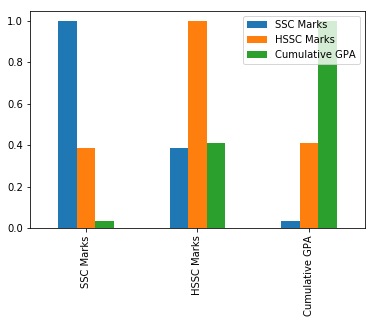

In [80]:
df1.corr(method ='pearson').plot(kind='bar')

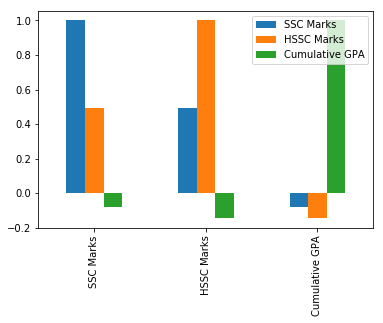

In [81]:
df1[df1['Cumulative GPA']>=2.0].corr(method ='pearson').plot(kind='bar')

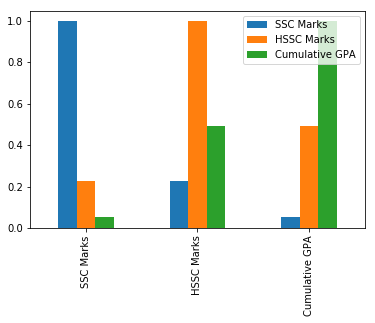

In [82]:
df1[df1['Cumulative GPA']<2.0].corr(method ='pearson').plot(kind='bar')

# 3) In which subject have the students face difficulties over the past few years because of which FAST has a lower GPA trend?

In [92]:
df.columns

Index(['Year of Admission and Batch of the student', 'Gender',
       'Resedential Area and city of origin', 'SSC Marks', 'HSSC Marks',
       'Entry Test Score Marks', '1st Semester', '2nd Semester',
       '3rd Semester', '4th Semester', '5th Semester', '6th Semester',
       '7th Semester', '8th Semester', '9th Semester', '10th Semester',
       '11th Semester', '12th Semester', '13th Semester', '14th Semester',
       '15th Semester', 'Cumulative GPA'],
      dtype='object')

In [262]:
df1=df.loc[:,'1st Semester':'15th Semester']

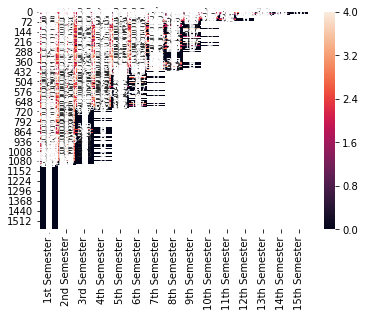

In [263]:
import seaborn as sns
%matplotlib inline

sns.heatmap(df1, annot=True)

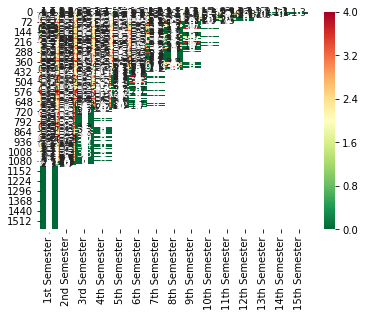

In [264]:
sns.heatmap(df1, cmap='RdYlGn_r',  annot=True)

# 4) Do we have an improvement trend of students who get into warnings during their study periods?

- we don't hav any column here where we can find warning

In [248]:
df.columns

Index(['Year of Admission and Batch of the student', 'Gender',
       'Resedential Area and city of origin', 'SSC Marks', 'HSSC Marks',
       'Entry Test Score Marks', '1st Semester', '2nd Semester',
       '3rd Semester', '4th Semester', '5th Semester', '6th Semester',
       '7th Semester', '8th Semester', '9th Semester', '10th Semester',
       '11th Semester', '12th Semester', '13th Semester', '14th Semester',
       '15th Semester', 'Cumulative GPA'],
      dtype='object')

In [271]:
def warning_count(x):
    return len([i for i in x if (i < 2 and i != np.nan)])

In [317]:
def warning_improve(x):
    
    a=[True if (i < 2 and i != np.nan) else False for i in x ]
    l=[]
    for i,v in enumerate(a):
        if i<14 and v==True :
            if x[i] !=0 and x[i+1]!=np.nan:
                l.append((x[i+1]/x[i])*100)
    try:
        return np.int64(np.average(l))
    except:
        pass
        
df['wm']=df.iloc[:,6:-1].apply(warning_improve, axis=1)
df.head()        

/home/muhammadqasim/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/muhammadqasim/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Year of Admission and Batch of the student,Gender,Resedential Area and city of origin,SSC Marks,HSSC Marks,Entry Test Score Marks,1st Semester,2nd Semester,3rd Semester,4th Semester,...,9th Semester,10th Semester,11th Semester,12th Semester,13th Semester,14th Semester,15th Semester,Cumulative GPA,warning_count,wm
0,2012,M,Karachi,645.0,364.0,43.68,1.41,2.15,2.00,2.10,...,2.00,0.69,2.33,1.60,2.00,1.08,0.00,1.92,10,124
1,2013,M,Karachi,638.0,312.0,47.04,1.22,2.31,1.98,0.41,...,1.23,1.15,0.00,1.67,1.50,0.00,0.00,2.09,12,165
2,2013,M,Karachi,693.0,686.0,47.73,1.74,1.54,2.85,1.35,...,1.07,2.04,2.00,2.07,1.44,1.33,NaN,2.00,9,-9223372036854775808
3,2013,M,Karachi,649.0,838.0,57.68,1.16,2.49,1.61,1.04,...,1.62,3.33,2.40,2.05,2.67,2.08,1.33,2.14,8,155
4,2013,M,Karachi,705.0,650.0,41.98,1.08,2.87,0.88,1.25,...,2.00,0.93,1.50,1.58,1.73,0.00,NaN,2.01,11,137


In [322]:
df.wm.value_counts()

-9223372036854775808    1062
 0                        21
 141                      13
 135                      10
 132                      10
 137                       9
 148                       8
 146                       8
 134                       8
 129                       8
 164                       7
 140                       7
 128                       7
 142                       7
 124                       7
 123                       7
 161                       7
 150                       7
 130                       6
 136                       6
 158                       6
 155                       6
 120                       6
 153                       6
 147                       6
 139                       6
 169                       6
 154                       5
 144                       5
 172                       5
                        ... 
 228                       1
 231                       1
 234                       1
 235          

In [273]:
df['warning_count'] = df.iloc[:,6:-1].apply(warning_count, axis=1)
df.tail()

,Year of Admission and Batch of the student,Gender,Resedential Area and city of origin,SSC Marks,HSSC Marks,Entry Test Score Marks,1st Semester,2nd Semester,3rd Semester,4th Semester,...,8th Semester,9th Semester,10th Semester,11th Semester,12th Semester,13th Semester,14th Semester,15th Semester,Cumulative GPA,warning_count
1568,2019,M,Karachi,704.0,NaN,60.13,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2
1569,2019,F,Karachi,737.0,NaN,60.88,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2
1570,2019,M,Dadu,672.0,NaN,62.70,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2
1571,2019,F,Karachi,739.0,NaN,70.02,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2
1572,2019,F,Karachi,779.0,NaN,71.96,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2


In [265]:
df.iloc[:,6:-1]

,1st Semester,2nd Semester,3rd Semester,4th Semester,5th Semester,6th Semester,7th Semester,8th Semester,9th Semester,10th Semester,11th Semester,12th Semester,13th Semester,14th Semester,15th Semester,Cumulative GPA
0,1.41,2.15,2.00,2.10,1.37,0.00,1.50,1.10,2.00,0.69,2.33,1.60,2.00,1.08,0.00,1.92
1,1.22,2.31,1.98,0.41,2.02,0.76,4.00,1.56,1.23,1.15,0.00,1.67,1.50,0.00,0.00,2.09
2,1.74,1.54,2.85,1.35,1.00,1.67,1.52,3.00,1.07,2.04,2.00,2.07,1.44,1.33,NaN,2.00
3,1.16,2.49,1.61,1.04,2.73,1.43,1.00,1.78,1.62,3.33,2.40,2.05,2.67,2.08,1.33,2.14
4,1.08,2.87,0.88,1.25,3.33,1.72,1.31,1.90,2.00,0.93,1.50,1.58,1.73,0.00,NaN,2.01
5,1.31,2.40,1.82,1.28,1.67,0.91,1.81,3.00,1.33,1.93,3.33,2.33,2.11,1.00,NaN,2.10
6,1.38,3.17,2.22,3.33,0.00,2.09,1.33,2.17,2.10,2.00,3.00,0.82,3.17,0.00,NaN,2.23
7,0.41,2.21,1.20,1.69,3.83,1.61,2.00,1.83,0.23,0.57,2.53,0.00,0.75,1.40,0.00,2.00
8,0.41,1.39,3.50,0.95,0.00,0.84,2.24,2.33,0.00,1.60,2.66,2.00,2.25,0.00,NaN,2.19
9,0.31,2.31,1.96,1.77,1.00,3.33,1.41,0.00,1.67,2.05,2.24,2.80,0.00,NaN,NaN,2.18


In [259]:
df['warning_count'].unique()

array([10, 12,  9,  8, 11,  5,  4,  7,  3,  6,  2,  1,  0])

# 5) Do we have a city or area-wise trend of students' performance?

In [109]:
df['Resedential Area and city of origin'].unique()

array(['Karachi', 'Dadu', 'Others', 'Hyderabad', 'Lahore', 'Ghotki',
       'Tharparkar', 'Larkana', 'Sukkur', 'Mirpur Khas', 'Umerkot',
       'Rahim Yar Khan', 'Bahawalpur', 'Khairpur', 'Badin', 'Islamabad',
       'Faisalabad', 'Shikarpur', 'Thatta', 'Naushero Feroze', 'Jamshoro',
       'Rawalpindi', 'Sahiwal', 'Sanghar', 'Multan', 'Peshawar',
       'Khuzdar', 'Lasbela'], dtype=object)

In [245]:
len(df['Resedential Area and city of origin'].unique())

28

In [119]:
df[~(df['Year of Admission and Batch of the student']==2019)]['Cumulative GPA'].unique()

array([1.92, 2.09, 2.  , 2.14, 2.01, 2.1 , 2.23, 2.19, 2.18, 2.05, 2.08,
       1.86, 2.13, 2.12, 1.94, 1.83, 2.17, 2.15, 2.22, 2.11, 2.06, 1.91,
       2.4 , 2.32, 1.78, 1.85, 2.58, 2.04, 2.25, 2.03, 2.48, 2.34, 2.45,
       2.38, 2.02, 2.24, 2.68, 3.07, 2.62, 3.17, 3.75, 2.53, 3.14, 2.95,
       3.19, 2.54, 2.78, 2.92, 3.32, 3.06, 2.59, 2.49, 2.88, 3.88, 3.39,
       2.21, 2.37, 2.81, 3.02, 2.35, 3.58, 3.79, 2.51, 2.94, 2.77, 2.27,
       2.07, 2.41, 3.45, 3.28, 2.31, 2.99, 3.3 , 2.16, 2.47, 2.76, 2.74,
       2.33, 2.65, 3.12, 3.66, 2.28, 2.85, 2.66, 3.1 , 2.3 , 2.42, 2.64,
       2.43, 0.  , 3.21, 3.27, 2.96, 3.05, 2.52, 2.98, 2.69, 2.86, 2.82,
       1.88, 2.8 , 2.55, 2.39, 3.37, 2.72, 2.26, 2.75, 3.54, 3.38, 3.34,
       2.63, 2.61, 1.7 , 3.46, 2.97, 2.46, 3.16, 2.7 , 3.48, 3.42, 3.64,
       1.98, 2.67, 2.6 , 2.5 , 3.31, 3.13, 1.87, 2.87, 2.89, 3.09, 2.71,
       3.24, 2.57, 3.9 , 3.33, 2.44, 3.08, 3.11, 3.01, 2.36, 3.  , 2.91,
       2.56, 3.43, 3.15, 1.81, 3.85, 3.4 , 2.93, 2.

In [107]:
df.columns

Index(['Year of Admission and Batch of the student', 'Gender',
       'Resedential Area and city of origin', 'SSC Marks', 'HSSC Marks',
       'Entry Test Score Marks', '1st Semester', '2nd Semester',
       '3rd Semester', '4th Semester', '5th Semester', '6th Semester',
       '7th Semester', '8th Semester', '9th Semester', '10th Semester',
       '11th Semester', '12th Semester', '13th Semester', '14th Semester',
       '15th Semester', 'Cumulative GPA'],
      dtype='object')

In [133]:
fig, ax = plt.subplots(nrows=2, ncols=2)

for row in ax:
    for col in row:
        col.plot(x, y)


0 0
1 1
2 2


NameError: name 'b' is not defined

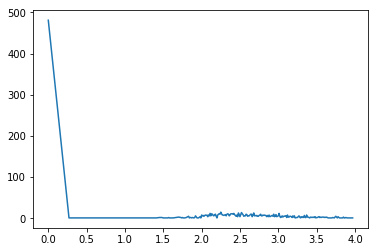

,cgpa
0,0.00
1,0.27
2,0.32
3,0.51
4,0.57
5,0.62
6,0.73
7,0.90
8,1.11
9,1.22


In [213]:
a=df.groupby(by=['Cumulative GPA']).agg(['count'])[['Gender']]
a = a.reset_index()
a.columns = ['cgpa','count1']

plt.plot(a[['cgpa']].values, a[['count1']].values)
plt.show()
a[['cgpa']]

========= Karachi ===========
Total: 1333 Passing 64.97 Percent


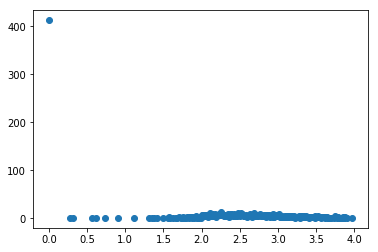

========= Dadu ===========
Total: 19 Passing 68.42 Percent


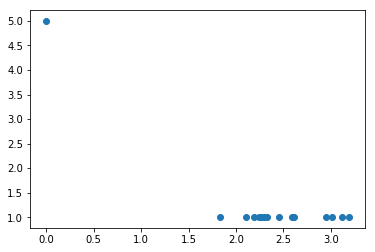

========= Others ===========
Total: 26 Passing 57.69 Percent


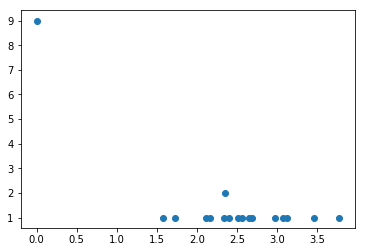

========= Hyderabad ===========
Total: 53 Passing 66.04 Percent


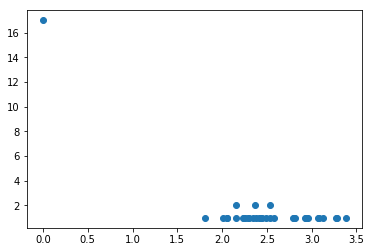

========= Lahore ===========
Total: 5 Passing 80.00 Percent


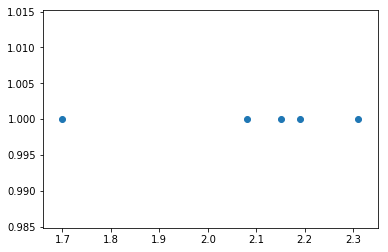

========= Ghotki ===========
Total: 6 Passing 83.33 Percent


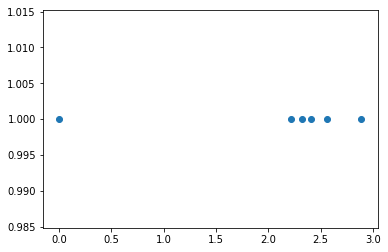

========= Tharparkar ===========
Total: 8 Passing 50.00 Percent


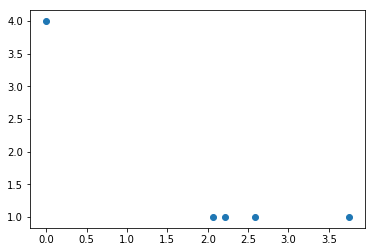

========= Larkana ===========
Total: 23 Passing 69.57 Percent


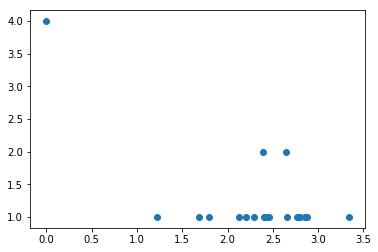

========= Sukkur ===========
Total: 15 Passing 40.00 Percent


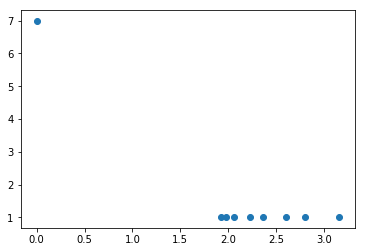

========= Mirpur Khas ===========
Total: 16 Passing 25.00 Percent


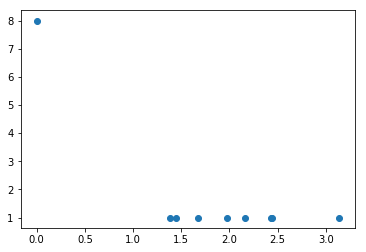

========= Umerkot ===========
Total: 22 Passing 59.09 Percent


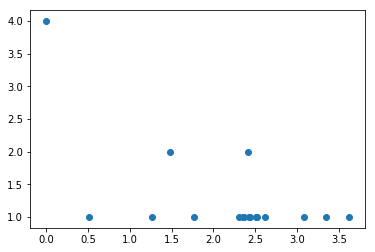

========= Rahim Yar Khan ===========
Total: 3 Passing 100.00 Percent


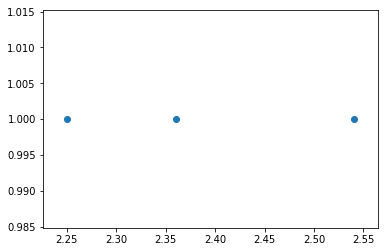

========= Bahawalpur ===========
Total: 5 Passing 80.00 Percent


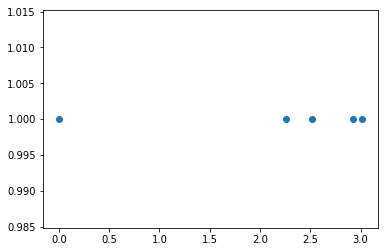

========= Khairpur ===========
Total: 7 Passing 42.86 Percent


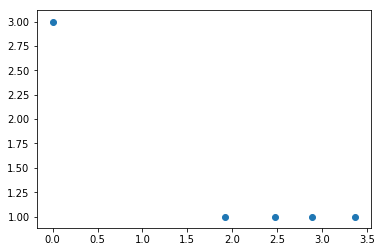

========= Badin ===========
Total: 5 Passing 100.00 Percent


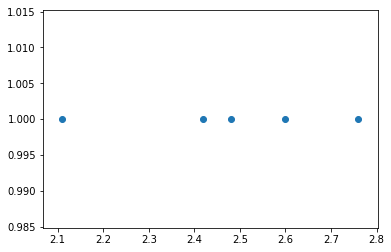

========= Islamabad ===========
Total: 5 Passing 80.00 Percent


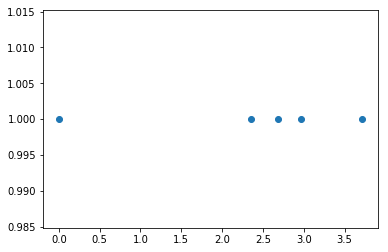

========= Faisalabad ===========
Total: 2 Passing 50.00 Percent


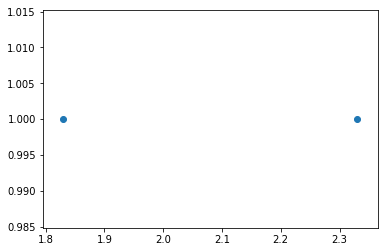

========= Shikarpur ===========
Total: 2 Passing 100.00 Percent


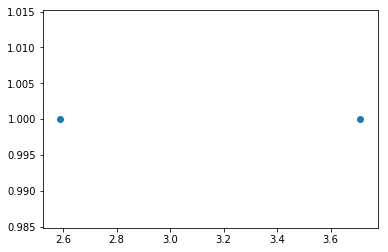

========= Thatta ===========
Total: 5 Passing 80.00 Percent


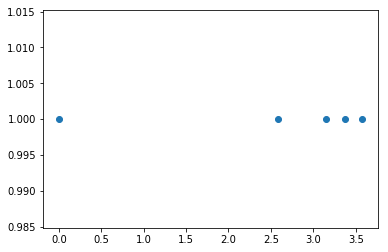

========= Naushero Feroze ===========
Total: 2 Passing 100.00 Percent


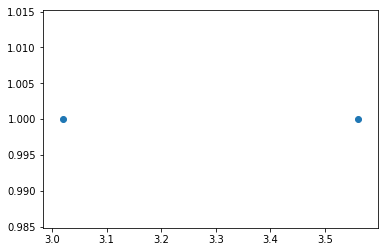

========= Jamshoro ===========
Total: 1 Passing 100.00 Percent


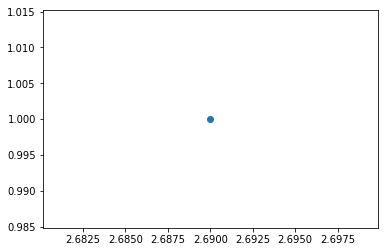

========= Rawalpindi ===========
Total: 3 Passing 100.00 Percent


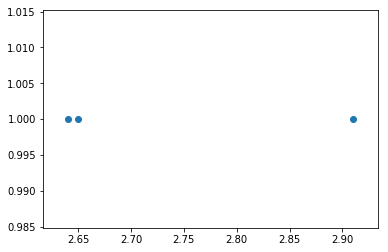

========= Sahiwal ===========
Total: 1 Passing 100.00 Percent


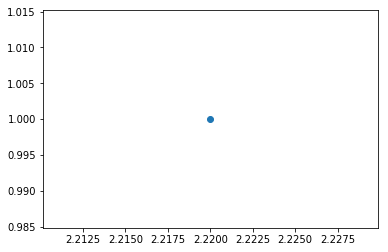

========= Sanghar ===========
Total: 2 Passing 0.00 Percent


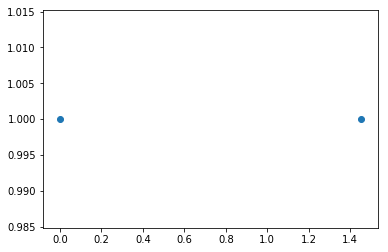

========= Multan ===========
Total: 1 Passing 100.00 Percent


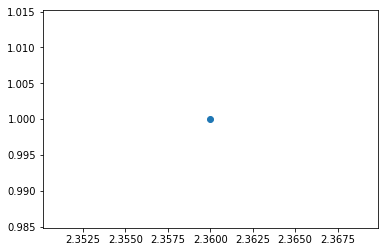

========= Peshawar ===========
Total: 1 Passing 100.00 Percent


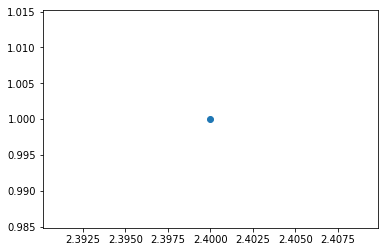

========= Khuzdar ===========
Total: 1 Passing 0.00 Percent


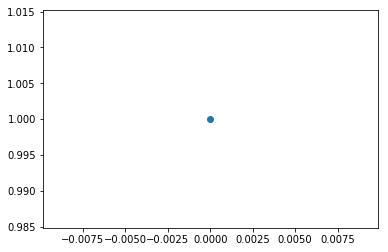

========= Lasbela ===========
Total: 1 Passing 0.00 Percent


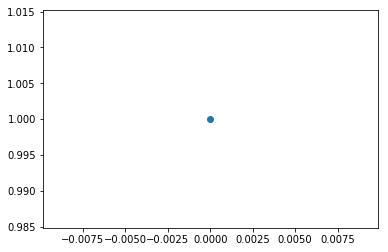

In [244]:
for city in df['Resedential Area and city of origin'].unique():
    print("=========",city,"===========")
    df1 = df[(df['Resedential Area and city of origin']==city)]
    
    df3 = df1
    print("Total:",len(df3), "Passing %.2f Percent"%(len(df3[df3['Cumulative GPA']>=2.0]) / len(df3) * 100))
    df2=df3.groupby(by=['Cumulative GPA']).agg(['count'])[['Gender']]
    df2 = df2.reset_index()
    df2.columns = ['cgpa','count1']
    plt.scatter(df2[['cgpa']].values, df2[['count1']].values)
    #p.set_xlim([-1,5])
    p.title.set_text(y)
    plt.show()

========= Karachi ===========
2012
1
2013
6
2014
14
2015
39
2016
306
2017
221
2018
344
2019
402


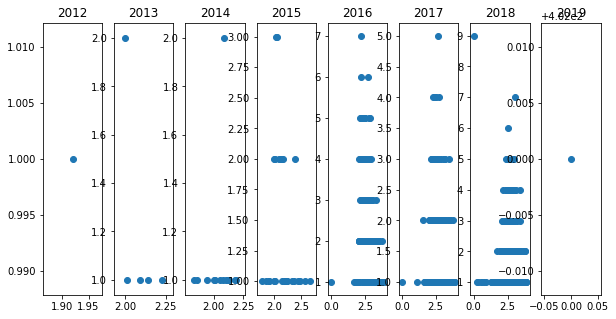

========= Dadu ===========
2013
1
2016
5
2017
5
2018
3
2019
5


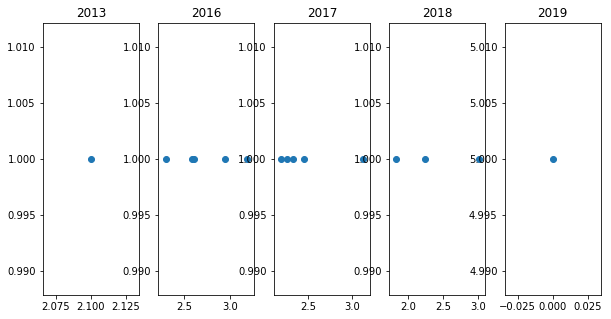

========= Others ===========
2014
2
2016
3
2017
5
2018
8
2019
8


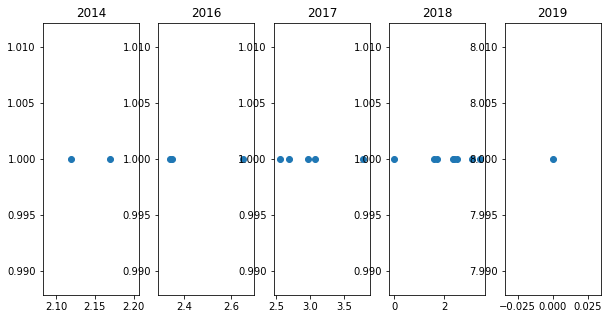

========= Hyderabad ===========
2015
1
2016
11
2017
12
2018
12
2019
17


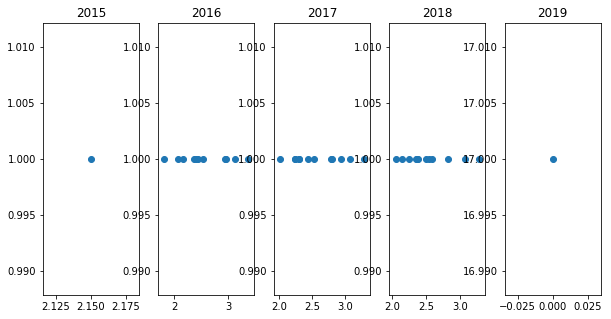

========= Lahore ===========
2015
2
2016
1
2017
1
2018
1


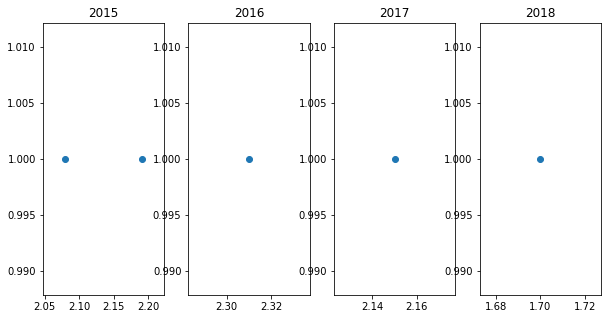

========= Ghotki ===========
2015
1
2017
1
2018
3
2019
1


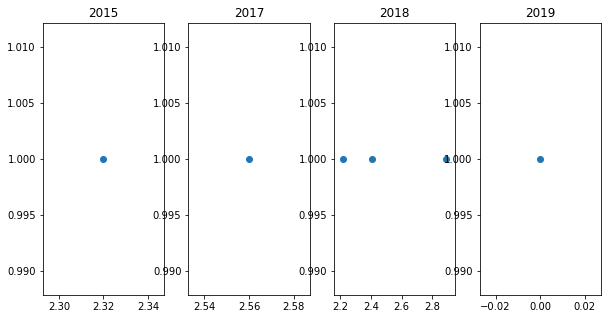

========= Tharparkar ===========
2016
2
2017
2
2019
4


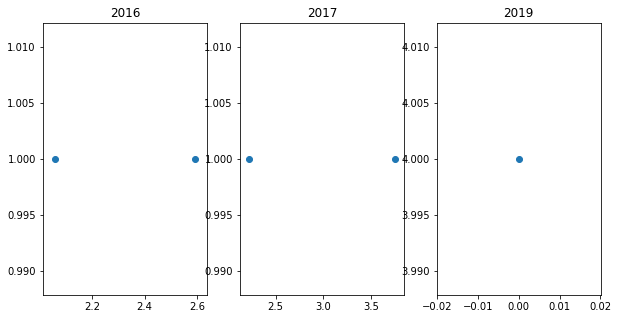

========= Larkana ===========
2016
5
2017
8
2018
6
2019
4


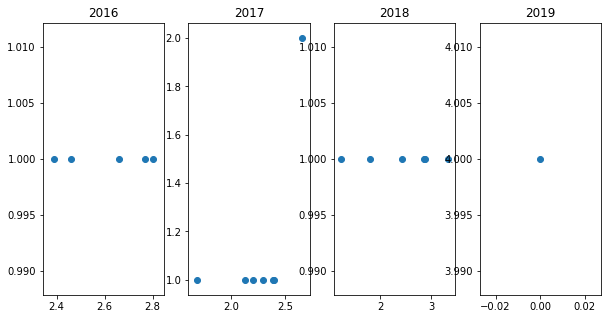

========= Sukkur ===========
2016
4
2017
1
2018
3
2019
7


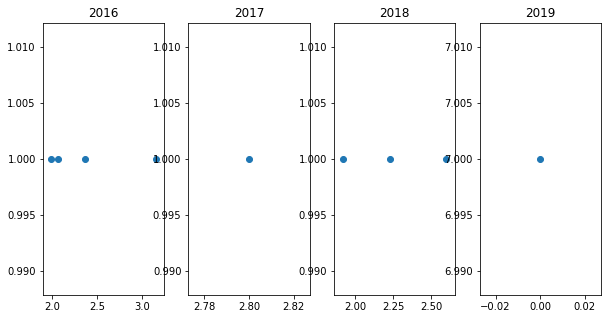

========= Mirpur Khas ===========
2016
1
2017
3
2018
4
2019
8


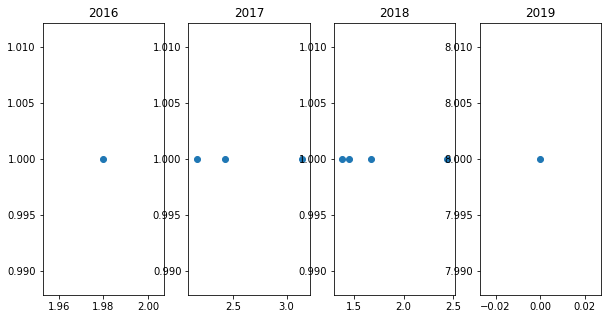

========= Umerkot ===========
2016
5
2017
4
2018
9
2019
4


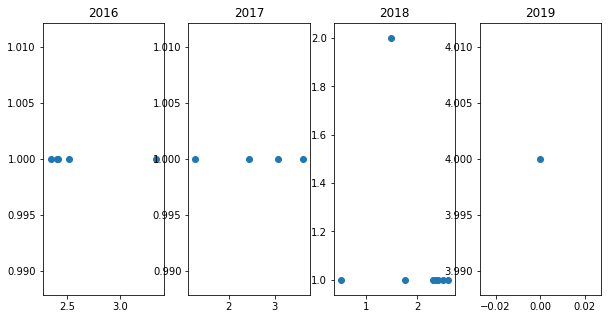

========= Rahim Yar Khan ===========
2016
1
2017
1
2018
1


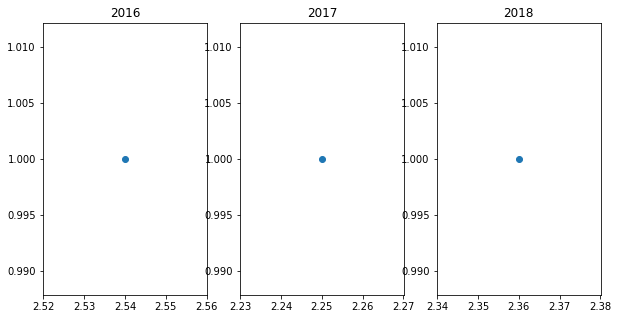

========= Bahawalpur ===========
2016
2
2017
1
2018
1
2019
1


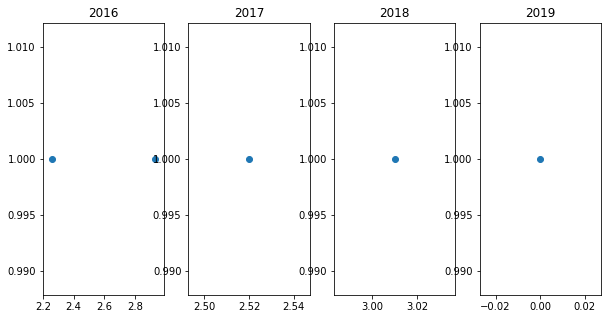

========= Khairpur ===========
2016
1
2017
1
2018
2
2019
3


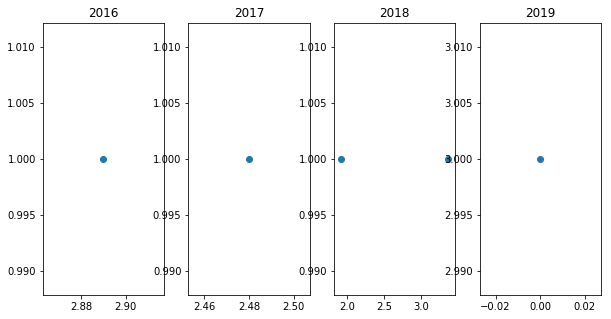

========= Badin ===========
2016
2
2017
2
2018
1


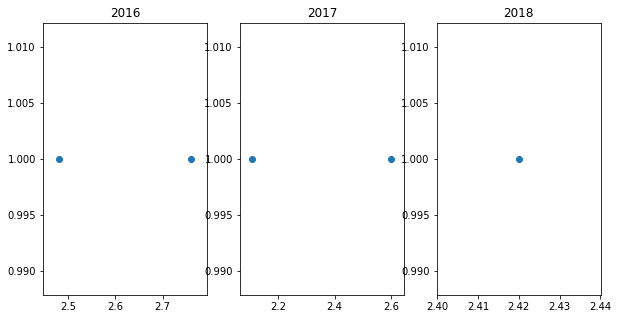

========= Islamabad ===========
2016
1
2017
1
2018
2
2019
1


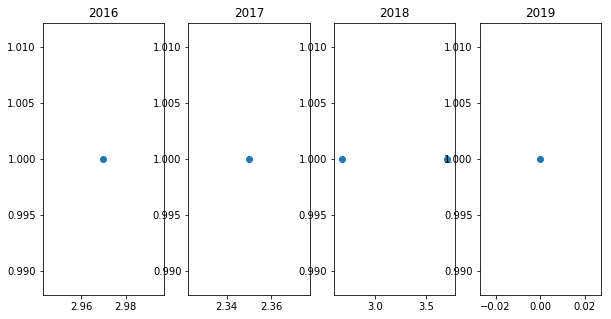

========= Faisalabad ===========
2016
1
2018
1


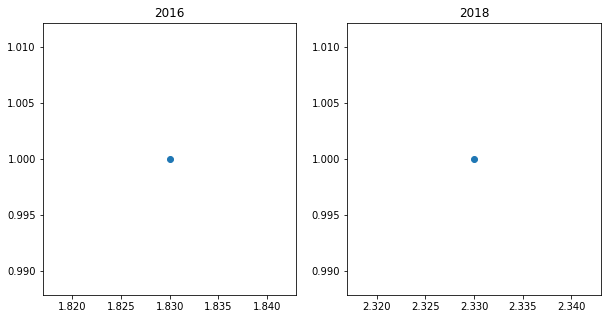

========= Shikarpur ===========
2017
1
2018
1


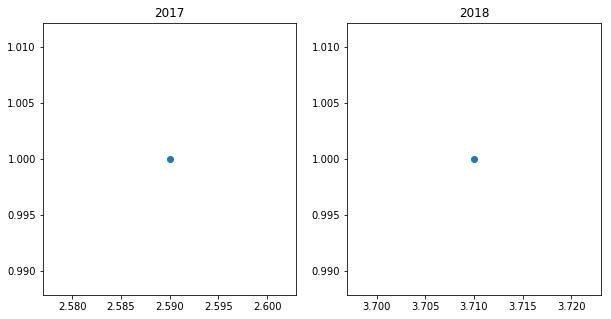

========= Thatta ===========
2017
3
2018
2


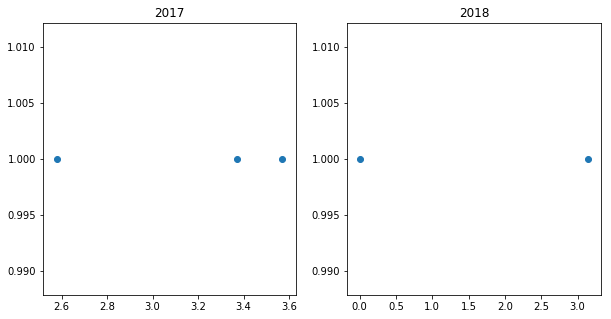

========= Naushero Feroze ===========
========= Jamshoro ===========
========= Rawalpindi ===========
========= Sahiwal ===========
========= Sanghar ===========
2018
1
2019
1


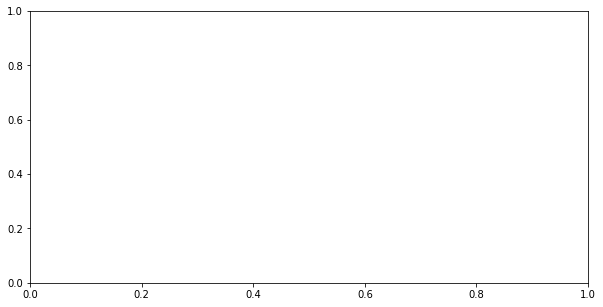

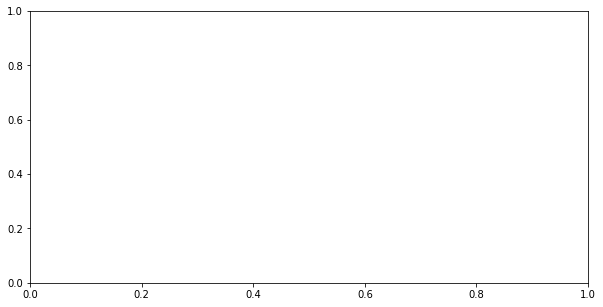

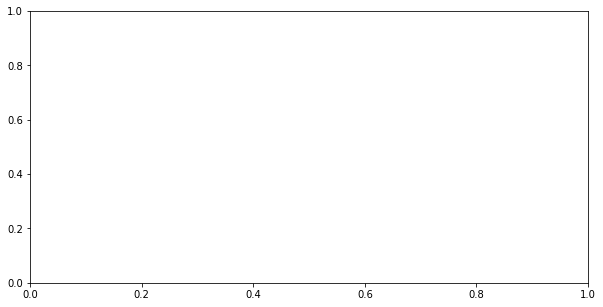

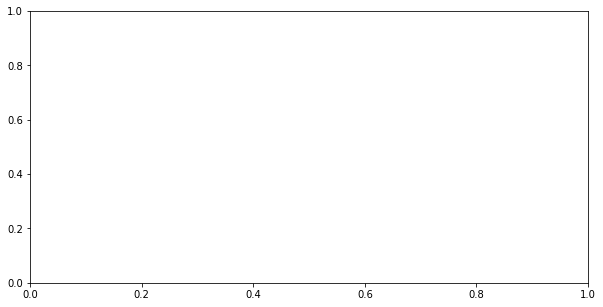

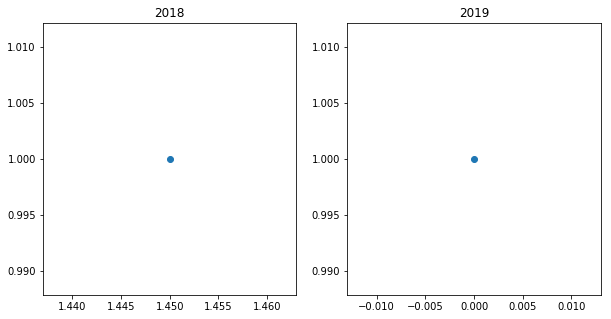

========= Multan ===========
========= Peshawar ===========
========= Khuzdar ===========
========= Lasbela ===========


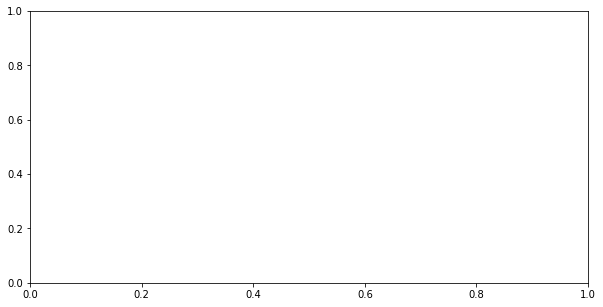

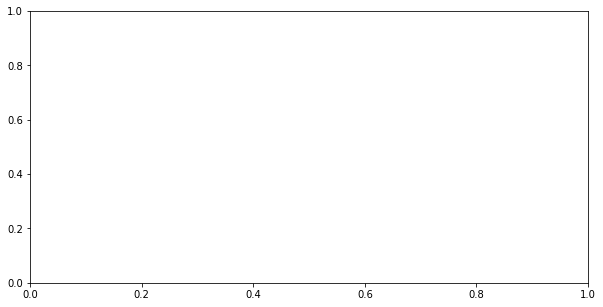

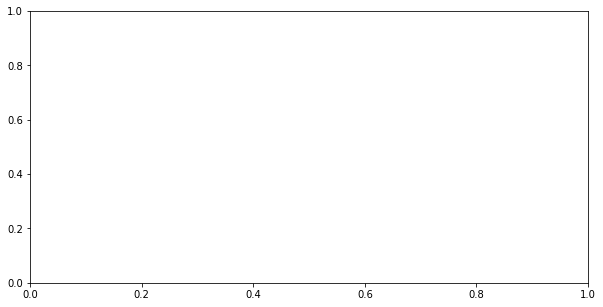

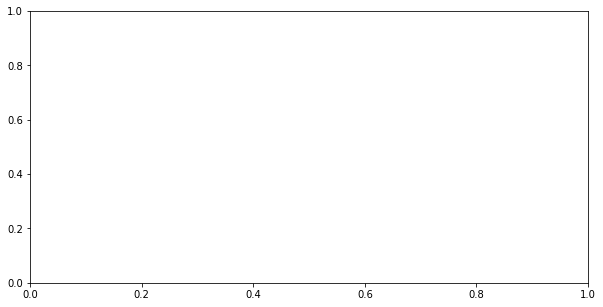

In [246]:
for city in df['Resedential Area and city of origin'].unique():
    print("=========",city,"===========")
    df1 = df[(df['Resedential Area and city of origin']==city)]
    
    fig, ax = plt.subplots(nrows=1, ncols=len(df1['Year of Admission and Batch of the student'].unique()), figsize=(10,5))
    
    
    try:
        for p, y in zip(ax,df1['Year of Admission and Batch of the student'].unique()):
            print(y)

            df3 = df1[df1['Year of Admission and Batch of the student']==y]
            print(len(df3))
            df2=df3.groupby(by=['Cumulative GPA']).agg(['count'])[['Gender']]
            df2 = df2.reset_index()
            df2.columns = ['cgpa','count1']
            p.scatter(df2[['cgpa']].values, df2[['count1']].values)
            #p.set_xlim([-1,5])
            p.title.set_text(y)
        plt.show()
    except:
        pass

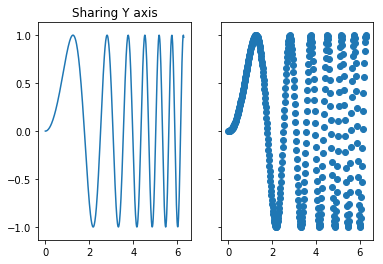

In [124]:
# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)


# Creates two subplots and unpacks the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)
